In [1]:
#!pip install pycaret[full]
#!pip install explainerdashboard
#!pip install --upgrade fairlearn==0.7.0 raiwidgets
#!pip install scikit-learn==0.23.2

# Data Import

## Import Modules

In [2]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *

## Set Paths

In [3]:
# set paths
ROOTDIR = os.getcwd()
DATAPATH = os.path.join(ROOTDIR, "data")
Path(DATAPATH).mkdir(parents=True, exist_ok=True)

## Import Customer Churn Dataset

In [4]:
# import data
filename = 'telco_customer_churn.csv'
df = pd.read_csv(os.path.join(DATAPATH, filename))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# chech data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# as we can see TotalCharges should be type float, lets fix this
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)# convert to float64
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [7]:
# chech data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Check NAs

In [8]:
# check NA values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# replace NA values with the median
median = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].replace(np.nan, median)

In [10]:
# check NA values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Seperate feature into numeric and categorical

In [11]:
# remember which features are numeric and which are categorical
numeric_features = list(df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].index)
numeric_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [12]:
categorical_features = list(df.dtypes[df.dtypes == 'object'].index)[1:-1]
categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

# Exploratory Data Analysis

In [13]:
# now that datatypes are correct, lets do some eda
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


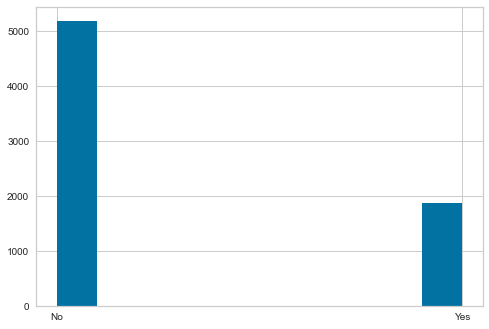

In [14]:
# show target distribution
df['Churn'].hist()
plt.show()

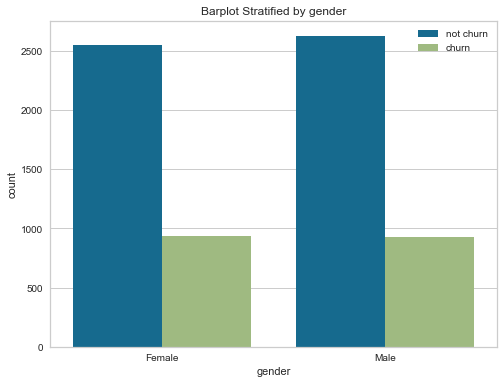

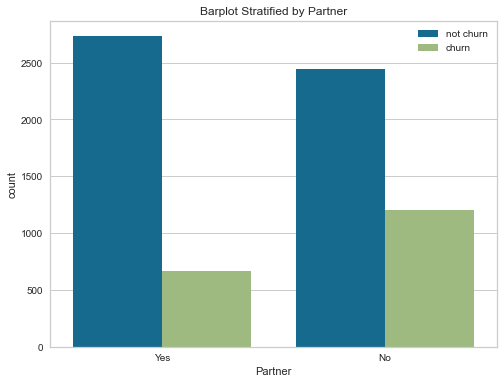

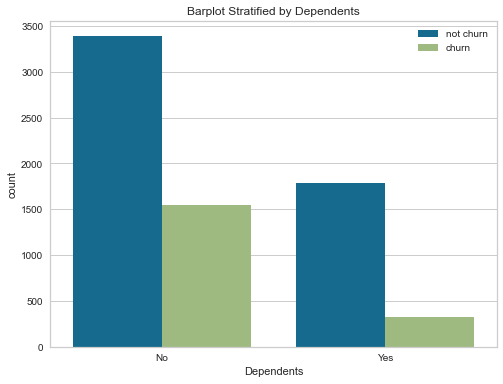

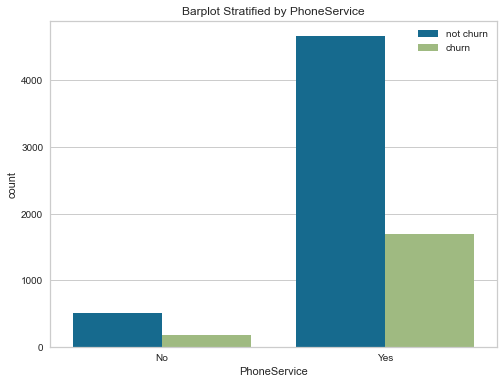

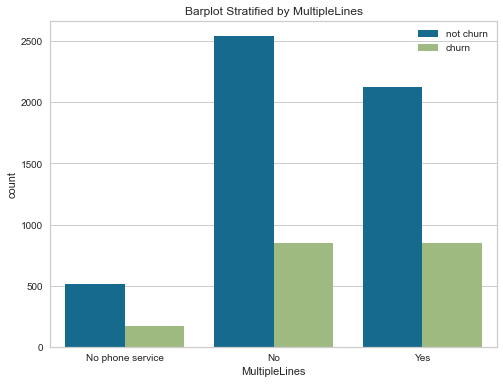

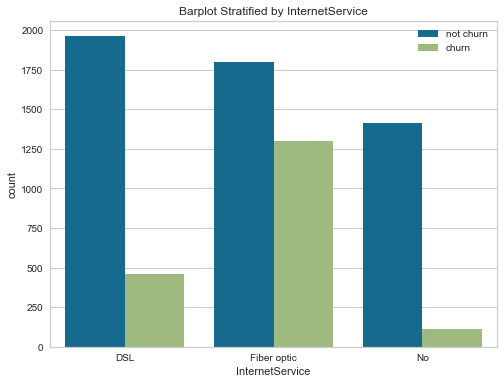

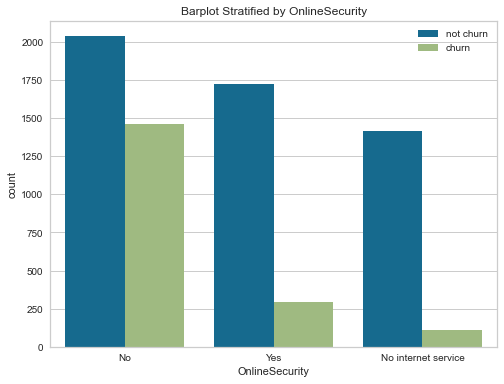

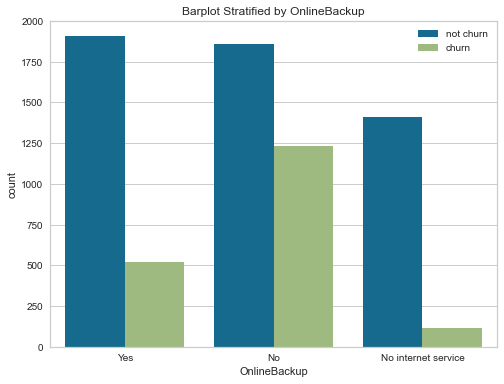

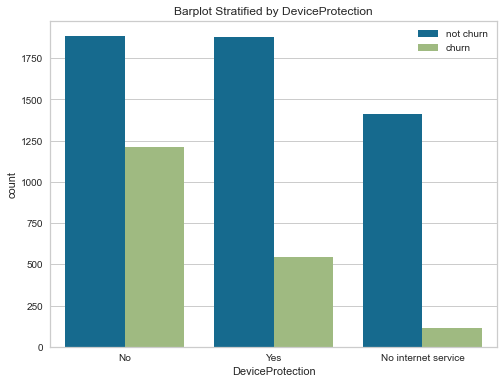

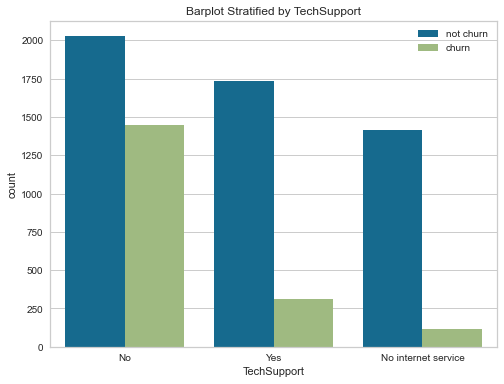

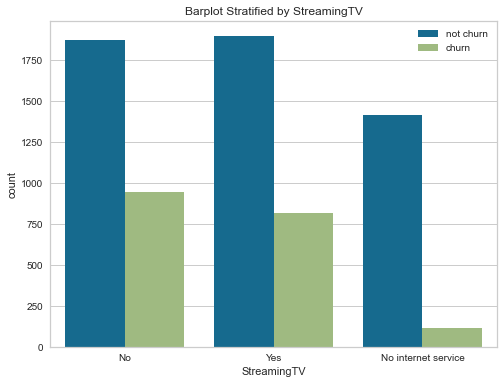

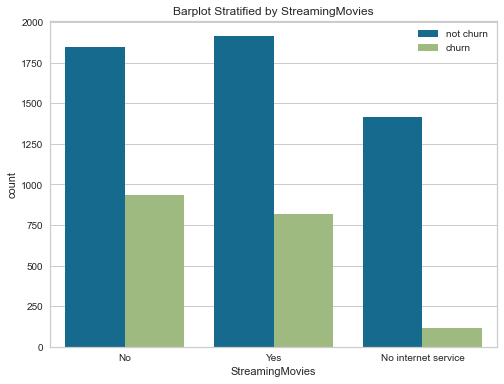

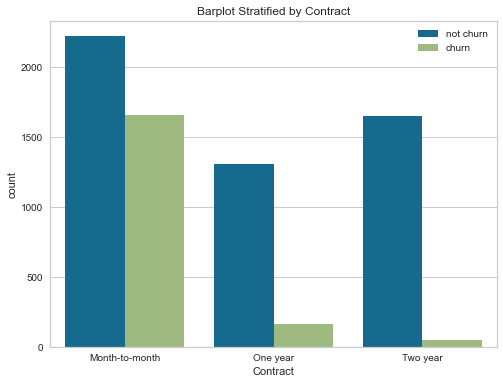

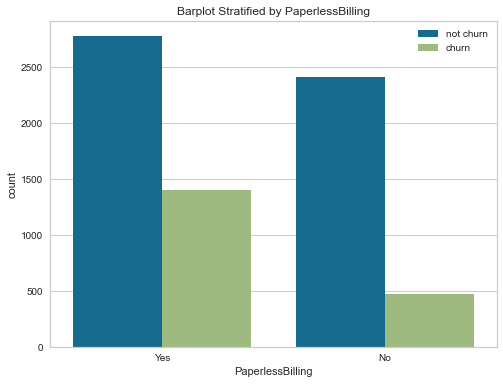

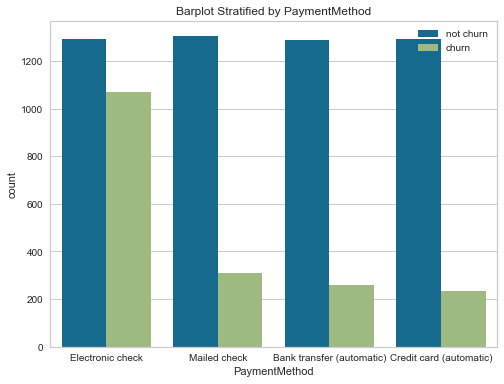

In [15]:
# show distribution of categorical features
for feat in categorical_features:
  fig, ax = plt.subplots(figsize=(8,6))
  ax = sns.countplot(x=feat, hue="Churn", data=df, ax=ax)
  ax.set_title('Barplot Stratified by '+feat)
  ax.legend(['not churn', 'churn'])
  plt.show()

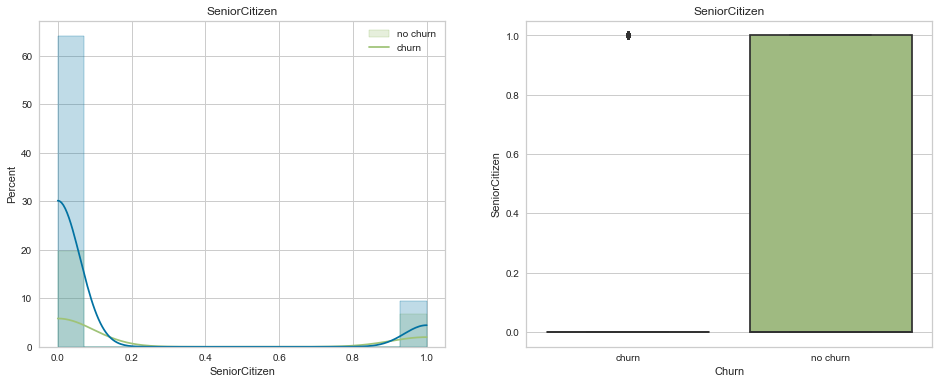

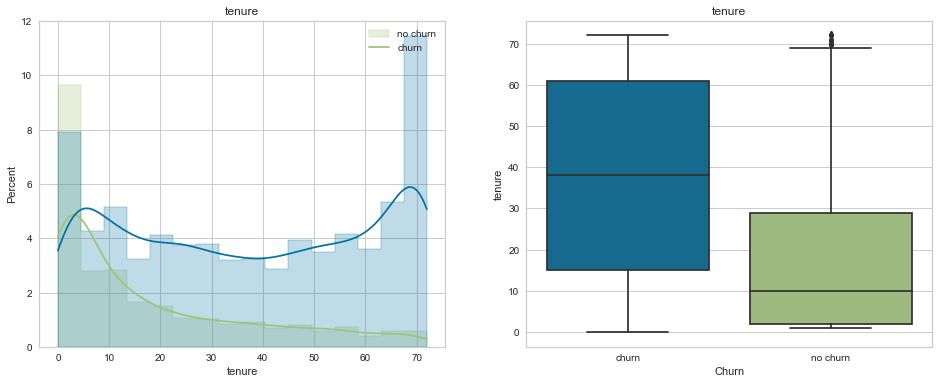

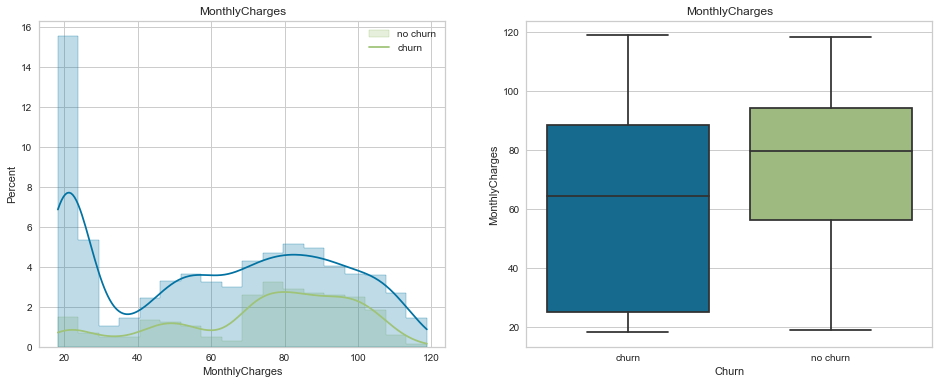

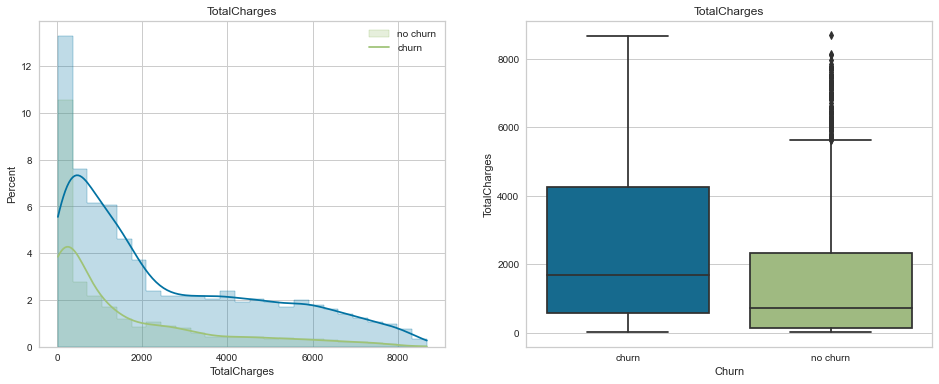

In [16]:
# plot distributions of numeric features
for col in numeric_features:
  try:
    fig, ax = plt.subplots(1,2, figsize=(16,6))
    
    sns.histplot(data=df, 
                 x=col, 
                 hue='Churn', 
                 stat='percent', 
                 kde=True,
                 element='step',
                 ax=ax[0])
    ax[0].set_title(col)
    ax[0].legend(['no churn', 'churn'])

    sns.boxplot(data=df, 
                y=col, 
                x='Churn',
                ax=ax[1])
    ax[1].set_title(col)
    ax[1].set_xticklabels(['churn', 'no churn'])

    plt.show()
  except:
    print('Singular matrix error due to constant feature value')

In [17]:
# normally, we would save the processed dataset having e.g. imputet missing values etc 
# however, using pycaret for auto-ml, no need to do any manual preprocessing 